In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision
import pandas as pd
import re
import numpy as np
import re
import numpy as np
import ast
import datetime
import torch.nn.functional as tf

use_gpu = True if torch.cuda.is_available() else False
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=False)

c:\Users\vitor\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\vitor/.cache\torch\hub\facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [3]:
def plot(imgs):
    grid = torchvision.utils.make_grid(imgs.clamp(min=-1, max=1), nrow=5, scale_each=True, normalize=True)
    plt.figure(figsize = (20,20))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

In [510]:
def load_normals(filename):
    df = pd.read_csv(filename, index_col=0)
    df.Normal =  df.Normal.apply(lambda x : np.fromstring(x.strip('[]'), sep=' '))
    df.Discounted =  df.Discounted.apply(lambda x : np.fromstring(x.strip('[]'), sep=' '))
    df.Normalized =  df.Normalized.apply(lambda x : np.fromstring(x.strip('[]'), sep=' '))
    return df

In [4]:
def save_noise(z):
    # convert tensor to numpy array
    array = z.numpy()

    key = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S").replace(" ", "").replace(":", "").replace("-", "")

    # save array as CSV file
    np.savetxt(f'z\\{key}.csv', array, delimiter=',')

In [5]:
def get_norm(v):
  # finding norm of the vector v
  return np.sqrt(sum(v**2))

def projection(u, v):
  return (np.dot(u, v)/get_norm(v)**2)*v

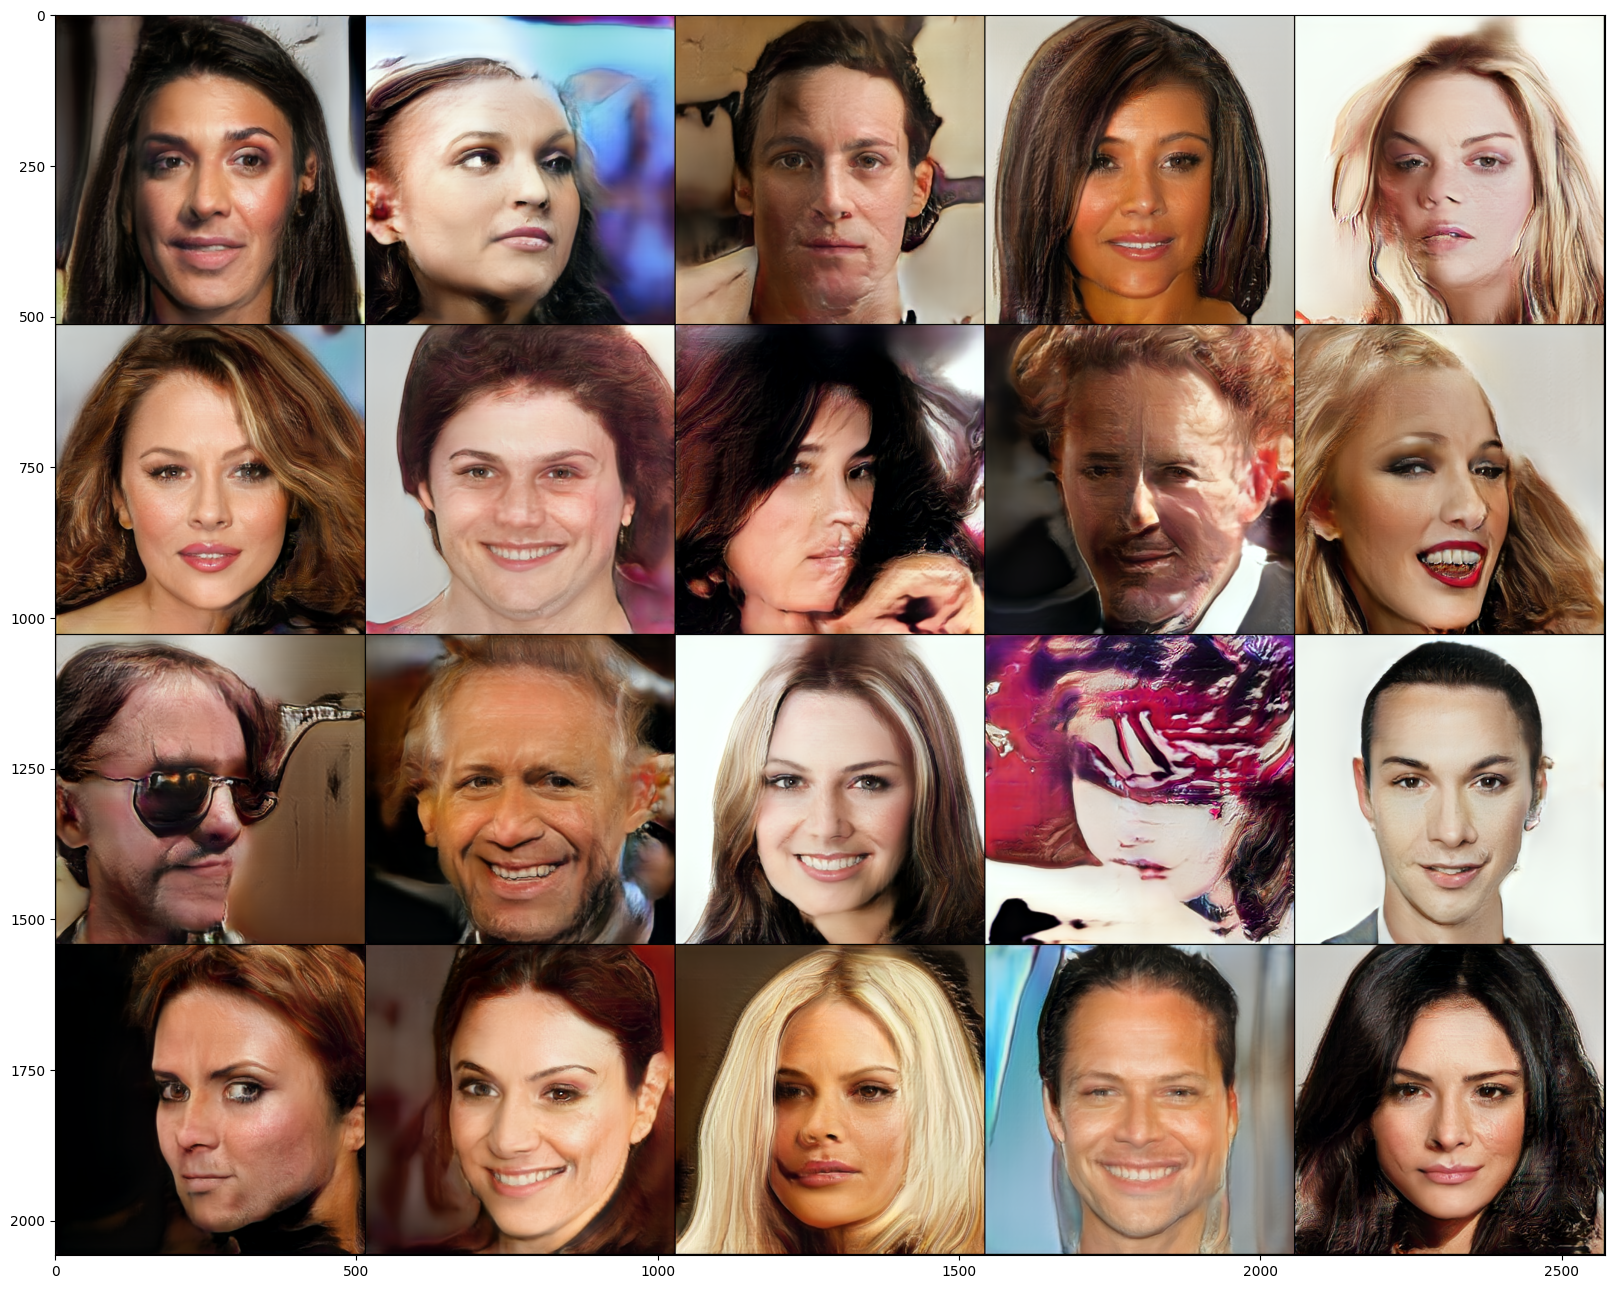

In [5]:
num_images = 20
noise, _ = model.buildNoiseData(num_images)
noise_normalized = tf.normalize(noise, dim=1)
with torch.no_grad():
    imgs = model.test(noise_normalized)
plot(imgs)

In [4]:
filename = 'data\\svm\\normal_discounted_normalized_updated'
df = pd.read_csv(filename, index_col=0)
df

Feature  Data Size  Training Accuracy  Testing Accuracy  \
0       5oClockShadow     2630.0           1.000000          0.815589   
1      ArchedEyebrows     3160.0           0.919304          0.825949   
2          Attractive    13620.0           0.834159          0.813877   
3       BagsUnderEyes     8580.0           0.856498          0.812937   
4                Bald    11800.0           0.899894          0.883898   
5               Bangs    27980.0           0.870756          0.865618   
6             BigLips    29140.0           0.840125          0.832361   
7             BigNose   100000.0           0.815050          0.810900   
8           BlackHair    11640.0           0.868342          0.843213   
9           BlondHair     3440.0           0.967297          0.824128   
10             Blurry   100000.0           0.809737          0.808150   
11          BrownHair     5430.0           0.894337          0.829650   
12      BushyEyebrows     7270.0           0.883425          0.834250   
13             Chubby    20230.0           0.858440          0.842808   
14         DoubleChin     5070.0           0.895710          0.816568   
15         Eyeglasses   100000.0           0.816388          0.816800   
16             Goatee    80290.0           0.830100          0.824387   
17           GrayHair     5280.0           0.888021          0.817235   
18        HeavyMakeup     2320.0           0.994612          0.765086   
19     HighCheekbones   100000.0           0.799750          0.794300   
20               Male   100000.0           0.606062          0.597050   
21  MouthSlightlyOpen   100000.0           0.605088          0.595150   
22           Mustache   100000.0           0.756850          0.756900   
23         NarrowEyes   100000.0           0.811987          0.809150   
24            NoBeard   100000.0           0.589013          0.587000   
25           OvalFace     4000.0           0.945625          0.843750   
26           PaleSkin      460.0           1.000000          0.663043   
27         PointyNose    15330.0           0.842792          0.805610   
28   RecedingHairline   100000.0           0.831013          0.827150   
29         RosyCheeks      900.0           1.000000          0.800000   
30           Sideburn    30490.0           0.848434          0.846343   
31            Smiling   100000.0           0.758250          0.750750   
32       StraightHair     2360.0           1.000000          0.817797   
33           WavyHair    90420.0           0.820090          0.813094   
34    WearingEarrings     2580.0           0.986919          0.773256   
35         WearingHat    79550.0           0.840383          0.839786   
36    WearingLipstick    28540.0           0.848108          0.843027   
37    WearingNecklace      610.0           1.000000          0.729508   
38     WearingNecktie    21500.0           0.860465          0.838837   
39              Young   100000.0           0.644550          0.632850   

    F1 Score                                             Normal  \
0   0.291971  [ 2.06163872e-01 -1.85288703e-01 -2.89702690e-...   
1   0.246575  [ 3.35851560e-03 -9.36920969e-02  1.09323791e-...   
2   0.274678  [ 1.06499496e-02 -2.43526211e-02  9.77990067e-...   
3   0.230216  [-3.48210944e-02  1.88060999e-02 -2.75488042e-...   
4   0.534014  [-1.96479802e-02  7.70862211e-03  2.99003487e-...   
5   0.448680  [ 6.34045112e-03  1.25111420e-02  4.98129819e-...   
6   0.168511  [-1.04253287e-03  4.93583472e-03 -2.55966982e-...   
7   0.193947  [-1.72374082e-02 -1.06679237e-02  1.67909587e-...   
8   0.396694  [-4.84295629e-02  7.07968907e-03  1.13656554e-...   
9   0.324022  [ 5.45586265e-02 -5.92343189e-01 -6.21747659e-...   
10  0.333738  [-0.03762427  0.01256426  0.01427322 -0.007983...   
11  0.381271  [ 3.43300649e-02  3.16154932e-02 -9.14279732e-...   
12  0.343324  [-1.05786251e-01  1.21126530e-02  8.40126955e-...   
13  0.354970  [ 0.01076478 -0.00689733  0.02737299  0.013003...   
14  0.311111  [

In [513]:
def normalize(arr):
    return arr / np.linalg.norm(arr)

In [522]:
df.Discounted = df.Discounted.apply(lambda x : normalize(x))

In [312]:
def projection_boundary(u, args):
    if len(args) == 0:
        return u
    if len(args) == 1:
        v = args[0]
        new = u - u.dot(v.T) * v
        return new / np.linalg.norm(new)
    elif len(args) == 2:
        v_1 = args[0]
        v_2 = args[1]
        u_v_1 = u.dot(v_1.T)
        u_v_2 = u.dot(v_2.T)
        v_1_v_2 = v_1.dot(v_2.T)
        alpha = (u_v_1 - u_v_2 * v_1_v_2) / (1 - v_1_v_2 ** 2 + 1e-8)
        beta = (u_v_2 - u_v_1 * v_1_v_2) / (1 - v_1_v_2 ** 2 + 1e-8)
        new = u - alpha * v_1 - beta * v_2
        return new / np.linalg.norm(new)
    else:
        vs = np.squeeze(np.asarray(args))
        A = np.matmul(vs, vs.T)
        B = np.matmul(vs, u.T)
        x = np.linalg.solve(A, B)
        new = u - (np.matmul(x.T, vs))
        return new / np.linalg.norm(new)


In [262]:
def get_discounted(df, label, conditions=df.Feature):
    u = df[df.Feature == label].Normalized.values[0]
    vs = np.empty((0, len(u)))
    for feature in conditions:
        if feature != label:
            v = df[df.Feature == feature].Normalized.values[0]
            vs = np.vstack((vs, v))
    p = projection_boundary(u, vs)
    return u - p

In [429]:
def get_discounted_conditional(df, u, conditions=df.Feature):
        vs = np.empty((0, len(u)))
        for feature in conditions:
                v = df[df.Feature == feature].Normalized.values[0]
                vs = np.vstack((vs, v))
        p = projection_boundary(u, vs)
        return (u - p) / np.linalg.norm(u - p)

In [428]:
def generate_altered(noise, direction, steps):
  altered_points = []
  s = -1
  e = 1
  step = (e - s) / steps
  for i in torch.arange(s, e, step):
    new_point = noise + i*direction
    altered_points.append(new_point / torch.norm(new_point))
  altered_points = torch.stack(altered_points).float()
  return altered_points

In [441]:
# Load the CSV file into a NumPy ndarray
z = np.loadtxt("z\\20230419190106.csv", delimiter=",")

In [444]:
z = torch.tensor(z).to(device)

In [581]:
primal = torch.tensor(df[df.Feature == 'Blurry'].Discounted.values[0]).to(device)

In [564]:
direction = torch.tensor(get_discounted_conditional(df, primal.cpu().numpy(), ['Male', 'Bald'])).to(device)

In [583]:
z = noise_normalized[3].to(device)

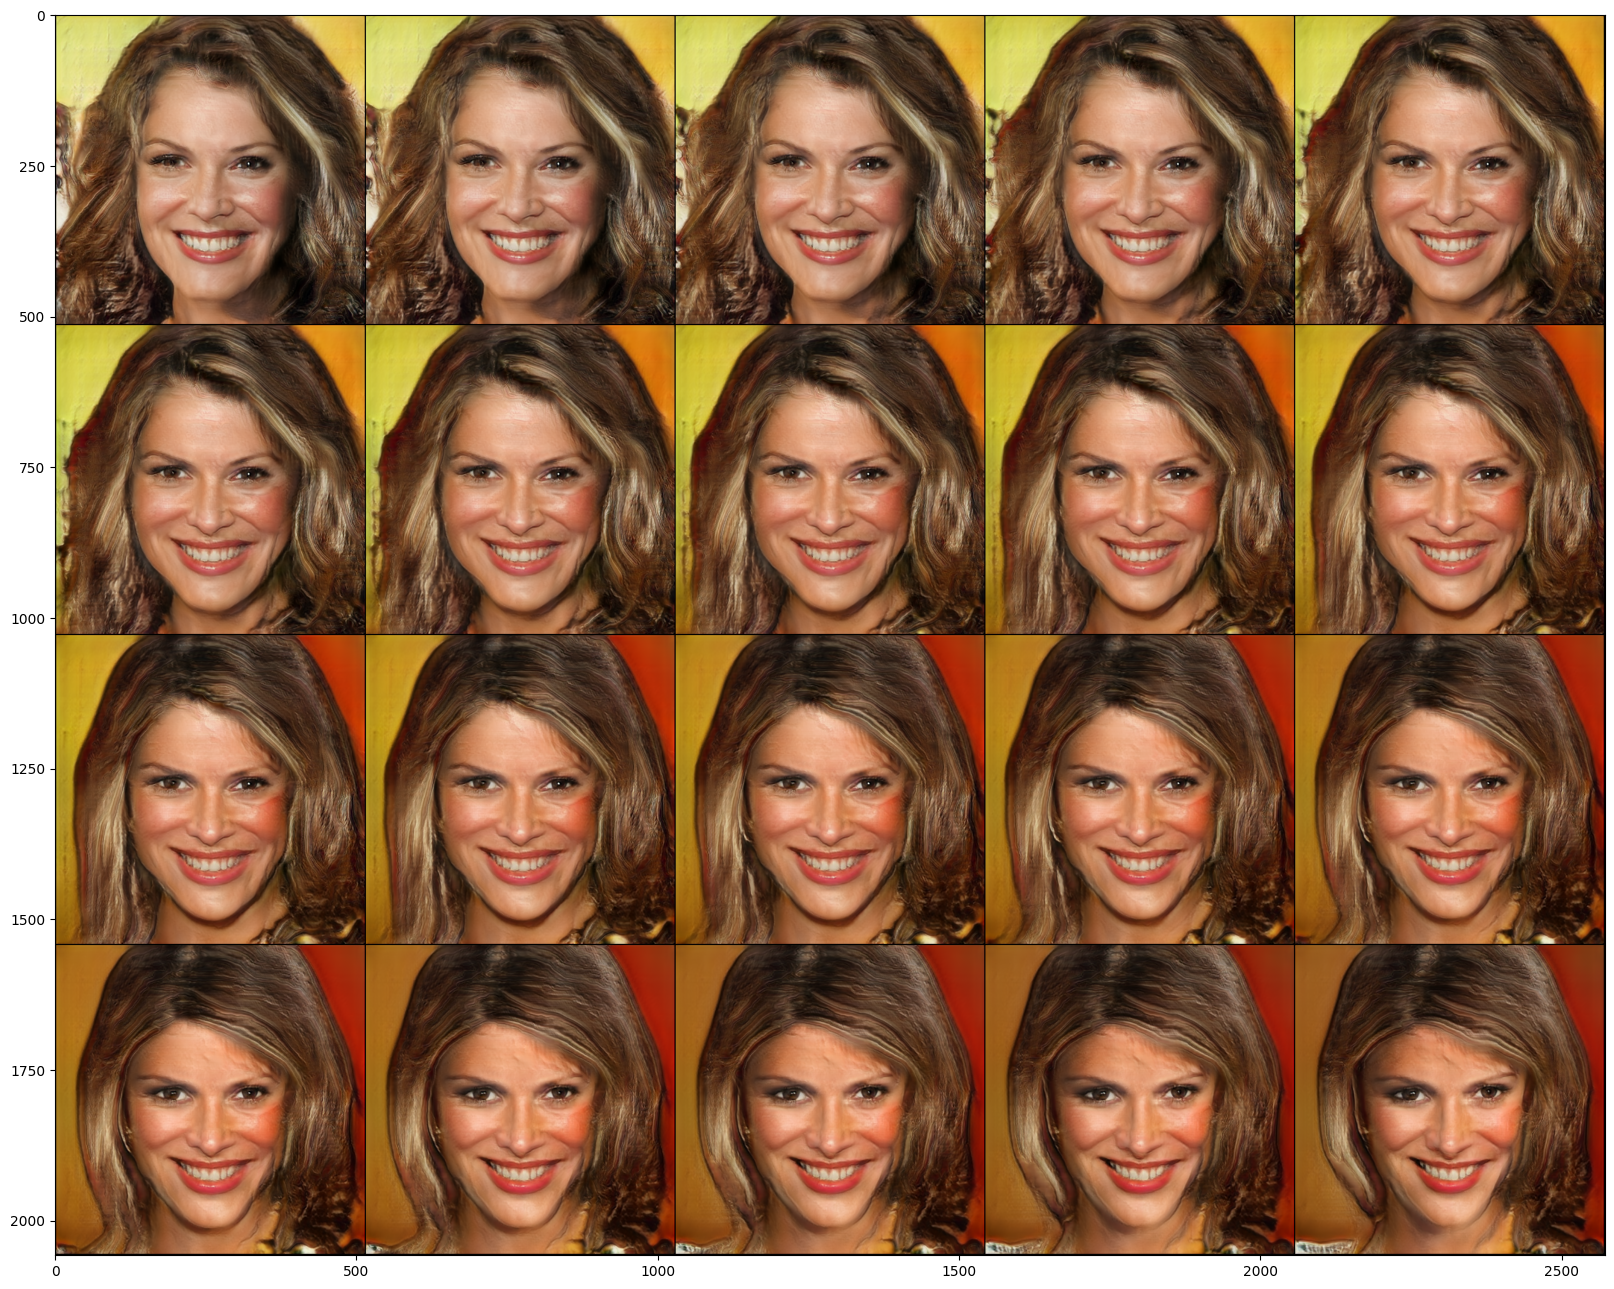

In [584]:
#z = altered_points[0]
altered_points = generate_altered(z, direction, 20)
altered_images = model.test(altered_points)
plot(altered_images)

In [575]:
save_noise(z.to('cpu'))